In [1]:
# import numpy as np
# from scipy.integrate import quad

# def kappa(xpp):
#     return xpp**2

# def tau(xp):
#     ss,err=quad(kappa,0.0,xp,epsrel=1e-3)
#     return ss

# def emissivity(xp):
#     return np.exp(-xp)

# def f(xp):
#     return emissivity(xp)*np.exp(-tau(xp))

# ss, err=quad(f,0.0,1.0,epsrel=1e-3)

# print('ss=',ss)

ss= 0.5972391681679584


In [1]:
import numpy as np

def epsilon(r, r1):
    return np.exp(-r/r1)

def rho(r, r2):
    return 1 / (1 + (r/r2)**2)

def kappa(rho, kappa0):
    return kappa0 * rho**2

def r_prime(R, x, s):
    theta = np.arcsin(s/R)
    return np.sqrt(R**2 + x**2 - 2*R*x*np.cos(theta))

def tau(x, R, r2, kappa0):
    integral = 0
    for x_p in np.linspace(0, x, 100):
        r_pp = r_prime(R, x_p, 0)
        integral += kappa(rho(r_pp, r2), kappa0) * (x/100)
    return integral

def surface_brightness(R, s, r1, r2, kappa0):
    integral = 0
    for x in np.linspace(0, np.sqrt(R**2 - s**2), 100):
        r_p = r_prime(R, x, s)
        integral += epsilon(r_p, r1) * np.exp(-tau(x, R, r2, kappa0)) * (x/100)
    return integral

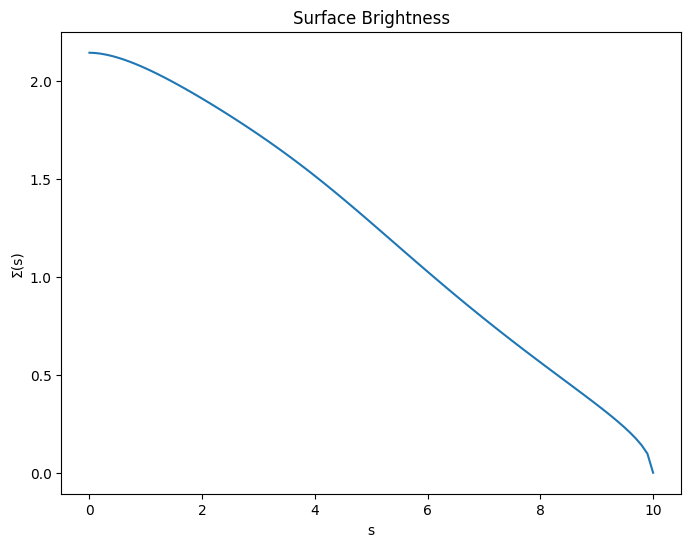

In [2]:
import matplotlib.pyplot as plt

R = 10
r1 = 5
r2 = 1
kappa0 = 2.5

s = np.linspace(0, R, 100)
surface_brightness_values = [surface_brightness(R, s_i, r1, r2, kappa0) for s_i in s]

plt.figure(figsize=(8, 6))
plt.plot(s, surface_brightness_values)
plt.xlabel('s')
plt.ylabel('Σ(s)')
plt.title('Surface Brightness')
plt.show()